In [63]:
import pandas as pd 
import numpy as np

In [64]:
train = pd.read_csv(r'C:\Users\steph\OneDrive\Documents\Data\web_traffic\train_1.csv')
train

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [66]:
# prep for time series

# Transpose to give dates as first column 
train_T = train.T

# Making the features the header
new_header = train_T.iloc[0] #grab the first row for the header
train_T = train_T[1:] #take the data less the header row
train_T.columns = new_header #set the header row as the df header

# dates column rename and type change
train_T.reset_index(level=0, inplace=True)
train_T = train_T.rename(columns={'index': 'date'})
train_T['date'] = pd.to_datetime(train_T['date'])

train_T

Page,date,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
0,2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2016-12-27,20.0,30.0,4.0,11.0,11.0,19.0,4.0,23.0,30.0,...,8.0,7.0,4.0,NaN,NaN,12.0,NaN,NaN,NaN,NaN
546,2016-12-28,22.0,52.0,6.0,17.0,27.0,23.0,15.0,32.0,36.0,...,21.0,13.0,2.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN
547,2016-12-29,19.0,45.0,3.0,19.0,13.0,17.0,6.0,39.0,38.0,...,14.0,12.0,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
548,2016-12-30,18.0,26.0,4.0,10.0,36.0,17.0,8.0,32.0,31.0,...,24.0,31.0,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN


In [67]:
features = list(set(train['Page']))

In [94]:
# Grouping by day
ts = train_T[['date', features[12]]]
ts = ts.groupby('date').sum()
ts = ts.asfreq('D')
ts

Page,Scott_Eastwood_de.wikipedia.org_all-access_spider
date,
2015-07-01,2.0
2015-07-02,2.0
2015-07-03,3.0
2015-07-04,2.0
2015-07-05,2.0
...,...
2016-12-27,6.0
2016-12-28,2.0
2016-12-29,2.0


<AxesSubplot:xlabel='date'>

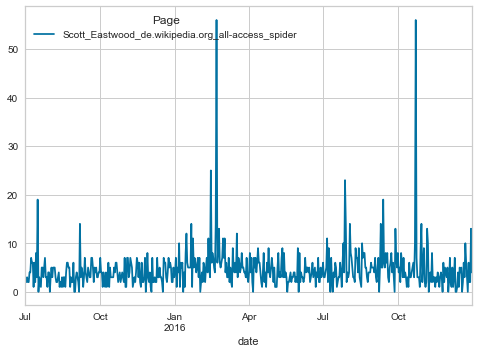

In [95]:
ts.plot()

In [96]:
# with functional API
from pycaret.time_series import *
setup(ts, fh = 90, fold = 3, session_id = 123)
# with new object-oriented API
#from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
#exp = TimeSeriesExperiment()
#exp.setup(data, fh = 7, fold = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(550, 1)"
2,Missing Values,False
3,Transformed Train Set,"(460,)"
4,Transformed Test Set,"(90,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


In [97]:
check_stats()

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,550.0
1,Summary,Statistics,Mean,,4.607273
2,Summary,Statistics,Median,,4.0
3,Summary,Statistics,Standard Deviation,,4.372286
4,Summary,Statistics,Variance,,19.116887
5,Summary,Statistics,Kurtosis,,69.792904
6,Summary,Statistics,Skewness,,6.55542
7,Summary,Statistics,# Distinct Values,,19.0
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 24}",69.500449
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 48}",95.868193


In [98]:
# functional API
plot_model(plot = 'ts')

In [99]:
# cross-validation plot
plot_model(plot = 'cv')

In [100]:
# ACF plot
plot_model(plot = 'acf')

In [101]:
# Diagnostics plot
plot_model(plot = 'diagnostics')

In [102]:
# Decomposition plot
plot_model(plot = 'decomp_stl')

In [103]:
# functional API
best = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2,TT (Sec)
grand_means,Grand Means Forecaster,2.6239,4.3686,645393837882134.6250,0.5227,0.9304,-0.1014,1.9233
theta,Theta Forecaster,2.7776,4.5465,661369436644354.1250,0.5473,0.9768,-0.2735,0.0133
auto_arima,Auto ARIMA,2.7641,4.5283,633504597784550.3750,0.5494,0.9752,-0.2340,2.2433
ets,ETS,2.6837,4.4938,548972402206348.8125,0.5547,0.9484,-0.2125,0.1867
exp_smooth,Exponential Smoothing,2.8156,4.5972,636064277452335.6250,0.5568,0.9897,-0.3273,0.1067
polytrend,Polynomial Trend Forecaster,3.0160,4.7449,811025056709730.8750,0.5685,1.0501,-0.6225,0.0133
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,2.9595,4.7231,731993504170215.1250,0.5689,1.0355,-0.5183,0.0233
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,3.0372,4.7941,802147994718983.6250,0.5694,1.0566,-0.6885,0.0200
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,3.0280,4.7856,773192792592681.0000,0.5697,1.0535,-0.6727,0.0200
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,3.0280,4.7856,773209513445737.3750,0.5697,1.0536,-0.6727,0.0233


In [104]:
# create fbprophet model
prophet = create_model('prophet')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2016-01-06 00:00:00,3.2391,6.7327,330705410884180.5625,0.5363,1.2693,-0.1134
1,2016-04-05 00:00:00,3.6817,4.2014,1076103456757093.3750,0.7175,1.1540,-2.7380
2,2016-07-04 00:00:00,3.3605,4.7946,604204914962440.1250,0.7343,1.1305,-0.5621
Mean,NaT,3.4271,5.2429,670337927534571.3750,0.6627,1.1846,-1.1378
SD,NaT,0.1868,1.0809,307879568675468.1875,0.0896,0.0606,1.1462


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [105]:
tuned_prophet = tune_model(prophet)
print(tuned_prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2016-01-06 00:00:00,3.1918,6.7030,350225880701142.4375,0.5232,1.2507,-0.1036
1,2016-04-05 00:00:00,2.6089,3.0594,867393214680951.2500,0.5937,0.8177,-0.9821
2,2016-07-04 00:00:00,2.7995,3.8899,1174125274182748.5000,0.5301,0.9418,-0.0282
Mean,NaT,2.8667,4.5508,797248123188280.6250,0.5490,1.0034,-0.3713
SD,NaT,0.2427,1.5592,339992944083869.6250,0.0317,0.1821,0.4330


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.006204765906220314,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=0.7814989008992034,
                     mcmc_samples=0, n_changepoints=25,
                     seasonality_mode='additive',
                     seasonality_prior_scale=2.1429563090768995,
                     stan_backend=None, uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [106]:
tuned_best = tune_model(best, optimize = 'MAPE')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2016-01-06,3.3468,6.8757,371876179757143.1250,0.5553,1.3115,-0.1612
1,2016-04-05,1.8575,2.2363,681437515046179.2500,0.4884,0.5822,-0.0591
2,2016-07-04,2.6674,3.9939,882867818843081.6250,0.5246,0.8974,-0.0839
Mean,nan,2.6239,4.3686,645393837882134.6250,0.5227,0.9304,-0.1014
SD,nan,0.6088,1.9125,210162593883185.1562,0.0274,0.2986,0.0435


In [107]:
plot_model(tuned_best, plot = 'forecast')

In [108]:
# forecast in unknown future
plot_model(tuned_best, plot = 'forecast', data_kwargs = {'fh' : 90})

In [109]:
# in-sample plot
plot_model(tuned_best, plot = 'insample')

In [110]:
# residuals plot
plot_model(tuned_best, plot = 'residuals')

In [111]:
# diagnostics plot
plot_model(tuned_best, plot = 'diagnostics')

In [112]:
# finalize model
final_best = finalize_model(tuned_best)
# generate predictions
predict_model(final_best, fh = 90)

2017-01-01    4.6073
2017-01-02    4.6073
2017-01-03    4.6073
2017-01-04    4.6073
2017-01-05    4.6073
               ...  
2017-03-27    4.6073
2017-03-28    4.6073
2017-03-29    4.6073
2017-03-30    4.6073
2017-03-31    4.6073
Freq: D, Name: Scott_Eastwood_de.wikipedia.org_all-access_spider, Length: 90, dtype: float64

In [113]:
# save the model
save_model(final_best, 'vari_0 best model')

Transformation Pipeline and Model Successfully Saved


(NaiveForecaster(sp=1, strategy='mean', window_length=None),
 'vari_0 best model.pkl')

In [114]:
#from pycaret.regression import *
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5) 
# tune top 5 base models
tuned_top5 = [tune_model(i, optimize = 'SMAPE') for i in top5]
# compare top 5
best2 = compare_models(include=tuned_top5)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2,TT (Sec)
0,Grand Means Forecaster,2.6239,4.3686,645393837882134.6250,0.5227,0.9304,-0.1014,0.0133
2,Auto ARIMA,2.7333,4.4986,632579413001264.6250,0.5446,0.9656,-0.2005,3.6533
1,Theta Forecaster,2.7776,4.5465,661369436644354.1250,0.5473,0.9768,-0.2735,0.0200
3,ETS,2.6837,4.4938,548972402206348.8125,0.5547,0.9484,-0.2125,0.1167
4,Exponential Smoothing,2.7838,4.5646,617532160683302.0000,0.5547,0.9819,-0.2705,0.0300


In [115]:
plot_model(best2, plot = 'forecast')
# forecast in unknown future
plot_model(best2, plot = 'forecast', data_kwargs = {'fh' : 90})
# in-sample plot
plot_model(best2, plot = 'insample')
# residuals plot
plot_model(best2, plot = 'residuals')
# diagnostics plot
plot_model(best2, plot = 'diagnostics')